In [41]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

#### Dataset:

https://www.sheffield.ac.uk/mash/statistics/datasets
    
This data set gives a variety of variables by US state at two time points 10 years apart. A variety of regressions and t-tests can be carried out with the main scale dependent being and Crime Rate (offences per million population) and t-tests with the independent being whether or not the state is in the south. Mostly discrete variables as they measure populations per 1000, there are some continuous variables such as those measuring expenditure

In [60]:
crime_data = pd.read_csv('datasets/Crime_R.csv')

crime_data.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


* Find the shape of the data,data type of individual columns

In [61]:
crime_data.shape

(47, 27)

In [62]:
crime_data = crime_data[['ExpenditureYear0', 'ExpenditureYear10']]

crime_data.head()

,ExpenditureYear0,ExpenditureYear10
0,69,71
1,55,54
2,47,44
3,46,41
4,106,97


* Describe the data

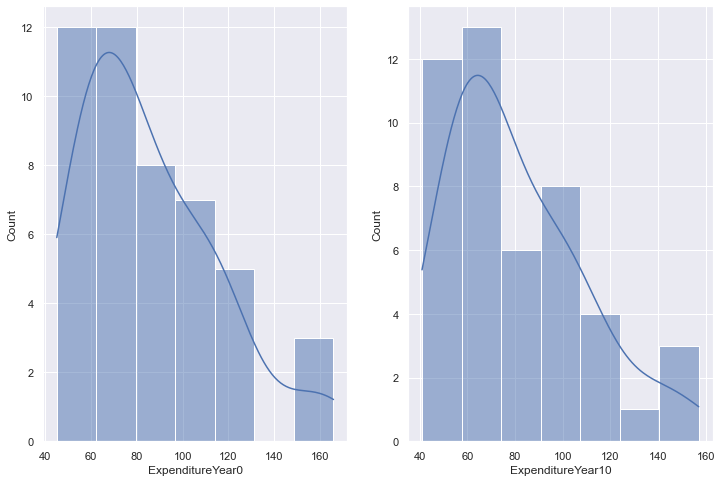

In [63]:
fig, axs = plt.subplots(figsize = (12, 8), ncols = 2)

sns.histplot(crime_data['ExpenditureYear0'], kde = True, ax = axs[0])

sns.histplot(crime_data['ExpenditureYear10'], kde = True, ax = axs[1])

plt.show()

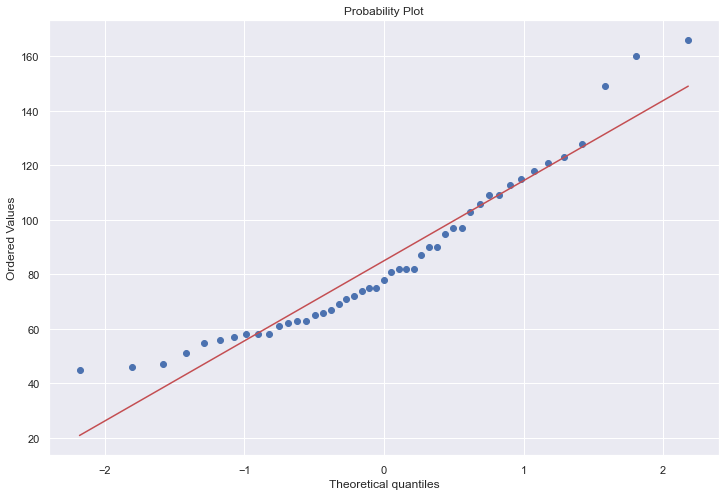

In [64]:
plt.figure(figsize = (12, 8))

stats.probplot(crime_data['ExpenditureYear0'], dist = 'norm', plot = plt);

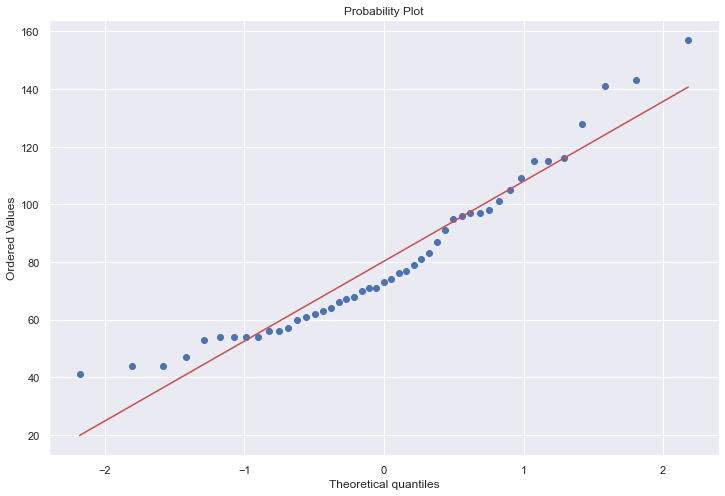

In [65]:
plt.figure(figsize = (12, 8))

stats.probplot(crime_data['ExpenditureYear10'], dist = 'norm', plot = plt);

In [66]:
stats.shapiro(crime_data['ExpenditureYear0'])

ShapiroResult(statistic=0.9230724573135376, pvalue=0.0042808703146874905)

In [67]:
stats.shapiro(crime_data['ExpenditureYear10'])

ShapiroResult(statistic=0.9283058047294617, pvalue=0.006580706220120192)

In [68]:
crime_data['Difference'] = crime_data['ExpenditureYear10'] - crime_data['ExpenditureYear0']

crime_data.head()

,ExpenditureYear0,ExpenditureYear10,Difference
0,69,71,2
1,55,54,-1
2,47,44,-3
3,46,41,-5
4,106,97,-9


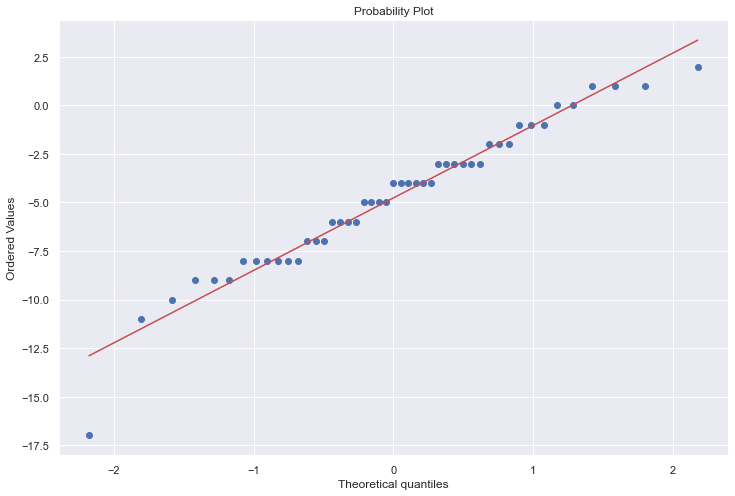

In [69]:
plt.figure(figsize = (12, 8))

stats.probplot(crime_data['Difference'], dist = 'norm', plot = plt);

In [70]:
stats.shapiro(crime_data['Difference'])

ShapiroResult(statistic=0.9627876877784729, pvalue=0.13874691724777222)

In [71]:
crime_data_long_form  = pd.melt(crime_data, 
                                value_vars = ['ExpenditureYear0', 'ExpenditureYear10'] ,
                                var_name = 'Year', value_name = 'Expenditure')

crime_data_long_form.sample(10)

,Year,Expenditure
38,ExpenditureYear0,82
60,ExpenditureYear10,115
91,ExpenditureYear10,116
74,ExpenditureYear10,66
81,ExpenditureYear10,157
77,ExpenditureYear10,77
50,ExpenditureYear10,41
88,ExpenditureYear10,98
68,ExpenditureYear10,70
52,ExpenditureYear10,60


In [72]:
crime_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ExpenditureYear0,47.0,85.000000,29.718974,45.0,62.5,78.0,104.5,166.0
ExpenditureYear10,47.0,80.234043,27.961319,41.0,58.5,73.0,97.0,157.0
Difference,47.0,-4.765957,3.707881,-17.0,-7.5,-4.0,-2.5,2.0


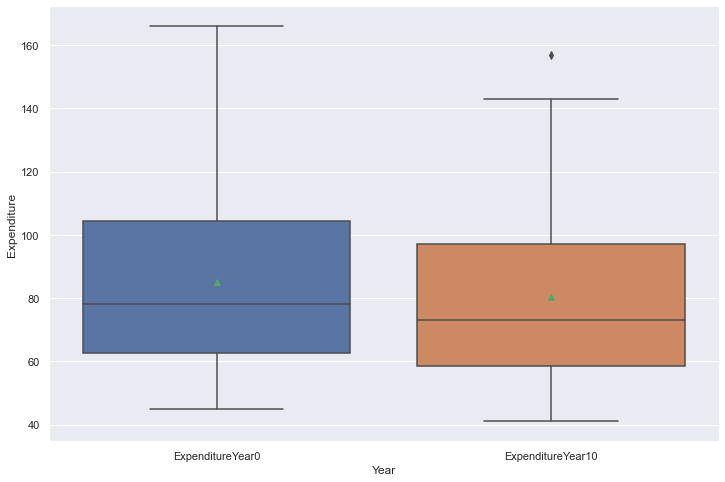

In [73]:
plt.figure(figsize = (12, 8))

sns.boxplot(y = 'Expenditure', x = 'Year', 
            showmeans = True, data = crime_data_long_form)

plt.show()

In [74]:
stats.levene(crime_data['ExpenditureYear0'], crime_data['ExpenditureYear10'])

LeveneResult(statistic=0.12229515954059589, pvalue=0.7273576766203647)

#### Paired t-test by using scipy.stats

In [75]:
stats.ttest_rel(crime_data['ExpenditureYear0'], crime_data['ExpenditureYear10'])

Ttest_relResult(statistic=8.811976044793944, pvalue=1.9360060460713323e-11)